In [1]:
import torch 
from torch import nn

In [2]:
#* creating known parameters
weights = 0.7
bias = 0.3 

#* creating data 
start = 0
end = 1 
step = 0.02


#* capital notation for matrix
#* small notation for vector
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X + bias


X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [3]:
X.shape, len(X)

(torch.Size([50, 1]), 50)

In [4]:
train_split = int(0.8 * len(X))
Xtrain, ytrain = X[:train_split], y[:train_split]
Xtest, ytest = X[train_split:], y[train_split:]

In [5]:
nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))

Parameter containing:
tensor([-2.0174], requires_grad=True)

## Plotting

In [6]:
import matplotlib.pyplot as plt
def plot_prediction(
    train_data = Xtrain,
    train_label = ytrain,
    test_data = Xtest,
    test_label = ytest,
    predictions = None,
):
    
    plt.figure(figsize=(12, 8))
    plt.suptitle("Linear Regression", fontsize=16)
    plt.scatter(train_data, train_label, label ="Trainig Data", c ='b', s= 4)
    plt.scatter(test_data, test_label, label ="Test Data", c ='g', s= 4)
    if predictions != None:
        plt.scatter(test_data, predictions, label ="Predictions", c ='r', s= 4)
    plt.show()
    

## First pytorch model

In [108]:
#* creating a model
#* linear regression model class 

class linearRegressionMOdel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights= nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32, ))
        
    def forward(self, x:torch.Tensor):
        return self.weights * x +self.bias
    

- torch.nn -> neural network
- torch.nn.functional -> functional
- torch.optim -> optimizer
- torch.utils.data -> data loader
- def forward() - all modules subclasses require overriding this method

more on [pytorch.org](https://pytorch.org)


In [109]:
torch.manual_seed(42)

model_0 =  linearRegressionMOdel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [110]:
model_0.state_dict() #* state_dict is a dictionary of all the parameters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

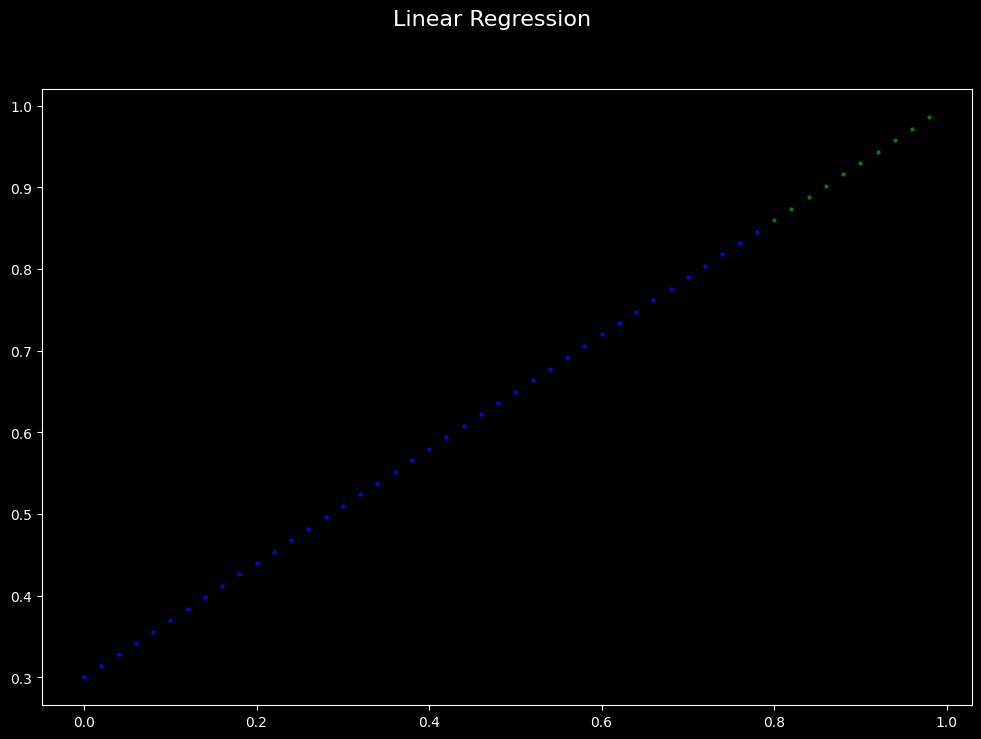

In [111]:
plot_prediction()

In [112]:
with torch.inference_mode():
    yhat = model_0(Xtest)

yhat

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [113]:
yhat2 = model_0(Xtest)
yhat2

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

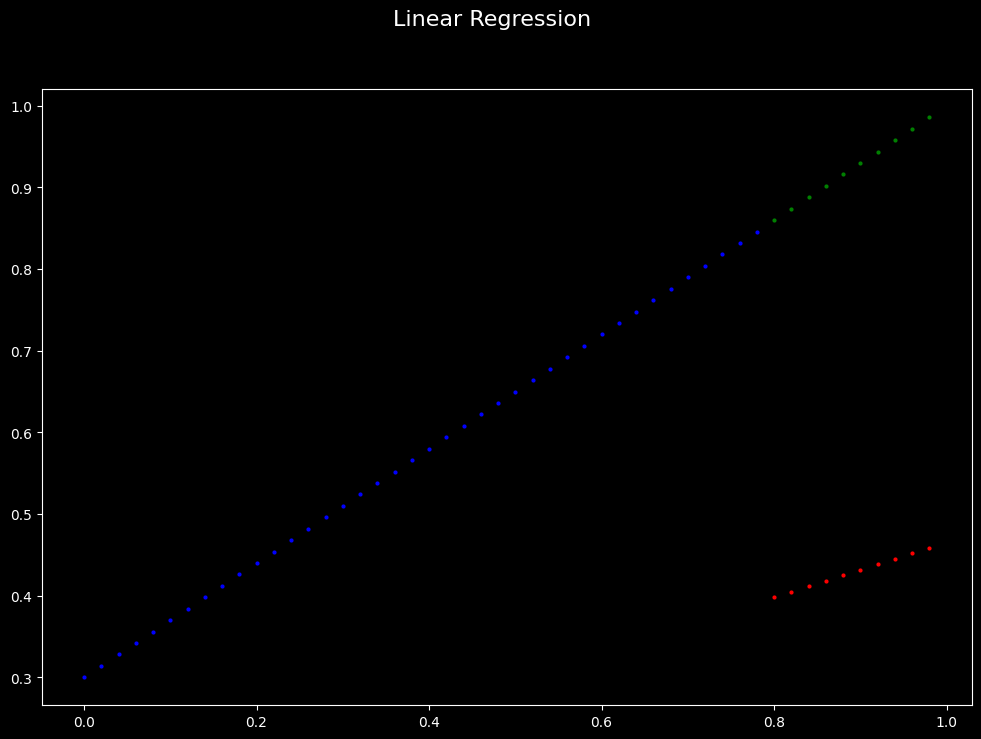

In [114]:
plot_prediction(predictions=yhat)

## Training


In [115]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr = 0.01)

# training loop

0. loop through the data 
1. forward pass - compute predictions
2. calculate loss
3. optimizer - compute gradients
4. loss.backward() - update weights
5. optimizer.step() - reset gradients to zero


In [116]:
model_0 =  linearRegressionMOdel()


In [117]:
#* training loop
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr = 0.01)
epochs = 1
epoch_count = []
train_loss_hist = []
test_loss_hist = []

for epoch in range(epochs):
    ## Training
    model_0.train() #* sets all parameters to require_grad = True
    
    #*1.forward pass 
    y_pred = model_0(Xtrain)
    
    #*2. compute loss
    loss = loss_fn(y_pred, ytrain)
    
    #*3 optimizer zero grad, as they accumulate by default
    optimizer.zero_grad() 
    
    #*4. backward pass
    loss.backward() 
    
    #*5. update parameters
    optimizer.step() #* by default,
    
    # if epoch % 100 == 0:
    #     print(f"Epoch {epoch}, loss: {loss.item()}")
    #     print(model_0.state_dict())
    
    model_0.eval() #* turns off gradient calculation, no detaching required
    
    ## Testing
    with torch.inference_mode():
    #with torch.no_grad(): #* you can all do this 
        #*1. forward
        test_pred = model_0(Xtest)
        
        #* test loss
        test_loss = loss_fn(test_pred, ytest)
        if epoch % 100 == 0:
            print(f"Epoch {epoch} | lost {loss} | test loss {test_loss}")
            print(model_0.state_dict()) 
            epoch_count.append(epoch)
            train_loss_hist.append(loss)
            test_loss_hist.append(test_loss)
        

Epoch 0 | lost 0.25122663378715515 | test loss 0.470524400472641
OrderedDict([('weights', tensor([0.2384])), ('bias', tensor([0.2403]))])


In [118]:
type(loss.item())

float

0. model.training
1. forward pass
2. calcuate the loss
3. zero grad 
4. backward pass
5. optimizer step

In [119]:
yhat = model_0(Xtest).detach() #* when you haven't called model.eval() 
#* detach() is used to remove the gradient from the tensor

In [120]:
yhat

tensor([[0.4310],
        [0.4358],
        [0.4406],
        [0.4453],
        [0.4501],
        [0.4549],
        [0.4596],
        [0.4644],
        [0.4692],
        [0.4739]])

In [121]:
type(yhat)

torch.Tensor

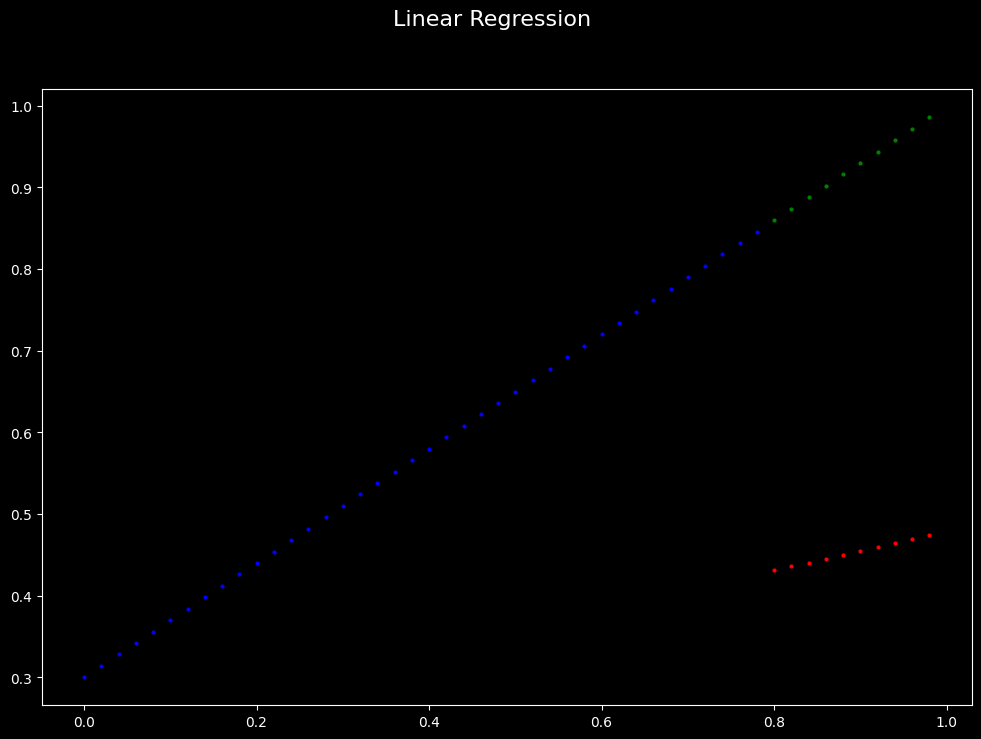

In [122]:
plot_prediction(predictions=yhat)

In [123]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr =0.01)
epochs = 10

for epoch in range(epochs):
    model_0.train()
    
    y_pred = model_0(Xtrain)
    loss = loss_fn(y_pred, ytrain)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

In [124]:
type(loss_fn)

torch.nn.modules.loss.L1Loss

In [125]:
loss_fn.__dict__

{'training': True,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 'reduction': 'mean'}

## Saving model

In [126]:
from pathlib import Path

#* 1 - create model idrecotry 
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

#* 2- create model save path 
model_name = "model_0.pth"
model_save_path = model_path/model_name

model_save_path

WindowsPath('models/model_0.pth')

In [127]:
torch.save(obj=model_0.state_dict(),
           f = model_save_path)
           

In [128]:
model_0.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [129]:
model_0 = linearRegressionMOdel()

In [130]:
model_0(Xtest)

tensor([[-1.0846],
        [-1.1071],
        [-1.1295],
        [-1.1520],
        [-1.1744],
        [-1.1969],
        [-1.2194],
        [-1.2418],
        [-1.2643],
        [-1.2867]], grad_fn=<AddBackward0>)

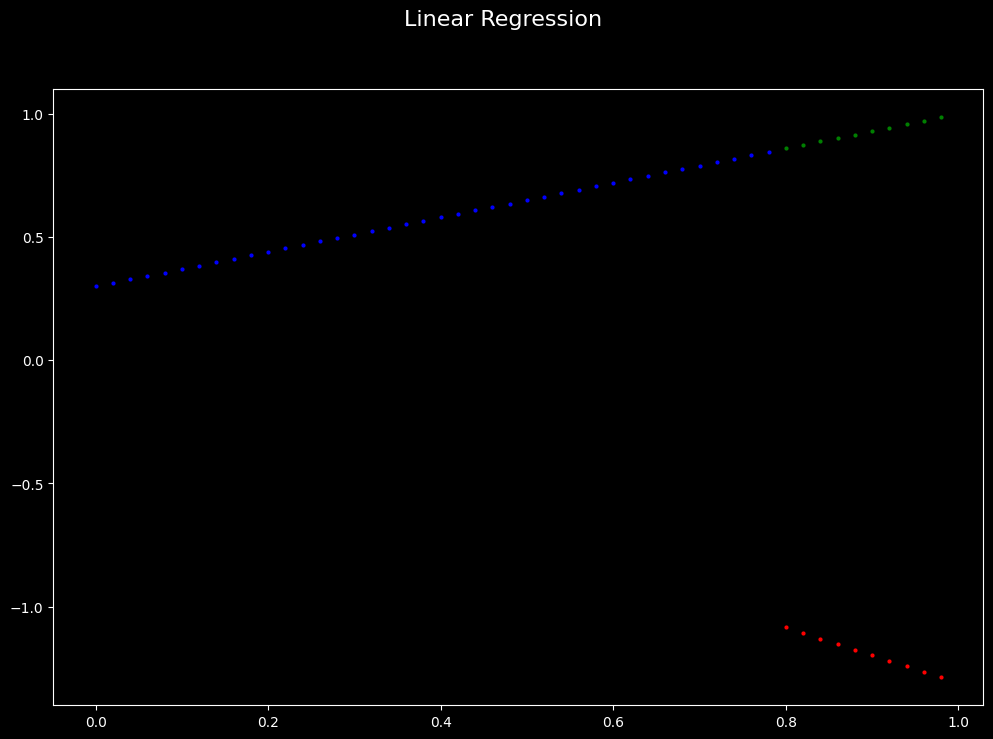

In [131]:
plot_prediction(predictions=model_0(Xtest).detach())

### Exporting model

In [132]:
model_scripted = torch.jit.script(model_0)
model_scripted.save("model_scripted.pt")

In [134]:
model = torch.jit.load("model_scripted.pt")
model.eval()

RecursiveScriptModule(original_name=linearRegressionMOdel)